In [1]:
%%HTML
<style> code {background-color : pink !important;} </style>

Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
# %matplotlib qt

cal_col = 9
cal_row = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((cal_row*cal_col,3), np.float32)
objp[:,:2] = np.mgrid[0:cal_col, 0:cal_row].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (cal_col,cal_row), None)
    
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
# For some reason, running below code hangs the jupyter kernel
        
        # Draw and display the corners
#         cv2.drawChessboardCorners(img, (cal_col,cal_row), corners, ret)
#         write_name = 'corners_found'+str(idx)+'.jpg'
#         cv2.imwrite(write_name, img)
#         cv2.imshow('img', img)
#         cv2.waitKey(500)

cv2.destroyAllWindows()

In [3]:
pickle_data_path = './test_images/dist_pickle.p'

### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

In [4]:
import pickle
%matplotlib inline

input_image_paths = [
    './test_images/test1.jpg',
    './test_images/test2.jpg',
    './test_images/test3.jpg',
    './test_images/test4.jpg',
    './test_images/test5.jpg',
    './test_images/test6.jpg',
]

output_image_paths = [
    './test_images/test_undist1.jpg'
    './test_images/test_undist2.jpg'
    './test_images/test_undist3.jpg'
    './test_images/test_undist4.jpg'
    './test_images/test_undist5.jpg'
    './test_images/test_undist6.jpg'
]

def image_calibration(input_image_path, output_image_path, pickle_data_path='./test_images/dist_pickle.p'):
# Test undistortion on an image
#     img = cv2.imread('./test_images/test1.jpg', 3)
    img = cv2.imread(input_image_path)
    img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

    dst = cv2.undistort(img, mtx, dist, None, mtx)
#     cv2.imwrite('./output_images/test_undist1.jpg',dst)
    cv2.imwrite(output_image_path, dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
#     pickle.dump( dist_pickle, open( "output_images/dist_pickle.p", "wb" ) )
    pickle.dump( dist_pickle, open( pickle_data_path, "wb" ) )

# Correct color channel arrangment
# http://stackoverflow.com/questions/39316447/opencv-giving-wrong-color-to-colored-images-on-loading
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Visualize undistortion
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=30)

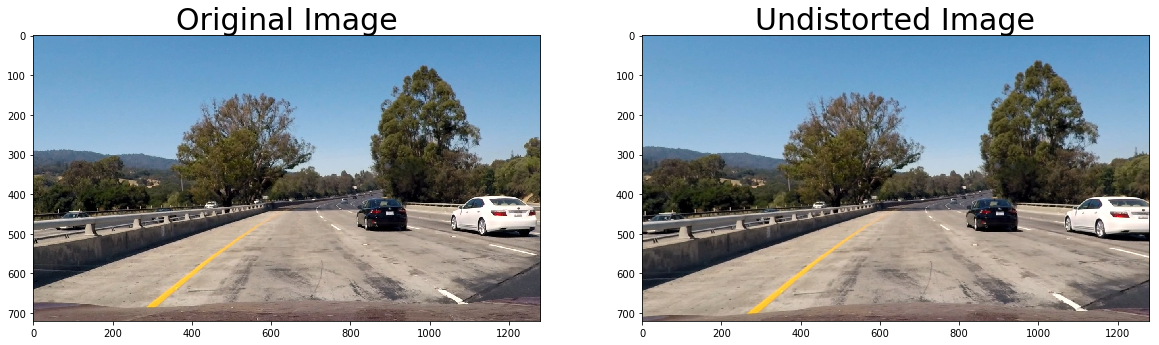

In [5]:
# Generator utils
# from itertool import cycle

def visualize():
    image_calibration((in_img for in_img in input_image_paths), (out_img for out_img in output_image_paths))

image_calibration(input_image_paths[0], output_image_paths[0], pickle_data_path)

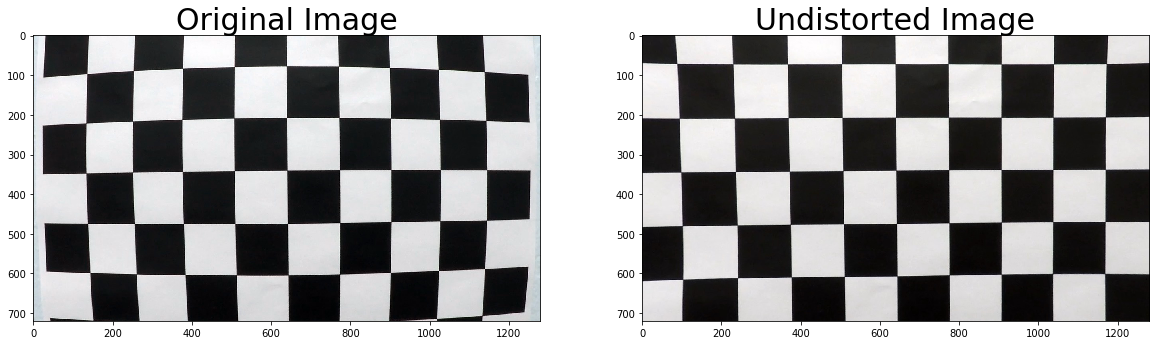

In [10]:
# Test undistort
def undistort(image_path, pickle_data_path='./test_images/dist_pickle.p'):
    dist_pickle = pickle.load(open(pickle_data_path, "rb"))
    fig = plt.figure()
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
    img = cv2.imread(image_path)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=30)
    
# Test undistort on chessboard image
undistort("camera_cal/calibration1.jpg", pickle_data_path)

In [7]:
# Save distoration correction dimension information
def save_chess_board_dim(pickle_data_path):
    dist_pickle = pickle.load(open(pickle_data_path, "rb"))
    dist_pickle["nx"] = cal_col
    dist_pickle["ny"] = cal_row
    pickle.dump( dist_pickle, open(pickle_data_path, "wb"))

save_chess_board_dim(pickle_data_path)